In [3]:
%pip install arch

  Using cached arch-8.0.0-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (13 kB)
Using cached arch-8.0.0-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (982 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Install once if needed
# pip install arch yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from arch import arch_model


In [5]:
data = yf.download(
    "RELIANCE.NS",
    start="2018-01-01",
    end="2024-01-01"
)

data = data[["Close"]]
data["Returns"] = 100 * data["Close"].pct_change()  # % returns
data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


Visualize Volatility Clustering

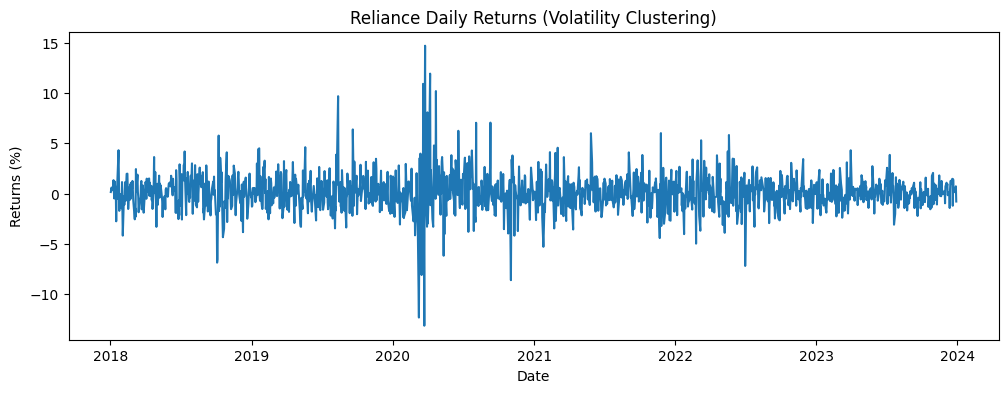

In [6]:
plt.figure(figsize=(12,4))
plt.plot(data["Returns"])
plt.title("Reliance Daily Returns (Volatility Clustering)")
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.show()


Fit GARCH

In [7]:
garch_model = arch_model(
    data["Returns"],
    vol="GARCH",
    p=1,
    q=1,
    mean="Zero",      # mean already ~0
    dist="normal"
)

garch_fit = garch_model.fit(update_freq=5)
print(garch_fit.summary())


Iteration:      5,   Func. Count:     31,   Neg. LLF: 2863.4554602866215
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2863.450657665367
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2863.45
Distribution:                  Normal   AIC:                           5732.90
Method:            Maximum Likelihood   BIC:                           5748.80
                                        No. Observations:                 1480
Date:                Fri, Jan 16 2026   Df Residuals:                     1480
Time:                        21:05:06   Df Model:                            0
         

In [8]:
data["GARCH_Volatility"] = garch_fit.conditional_volatility

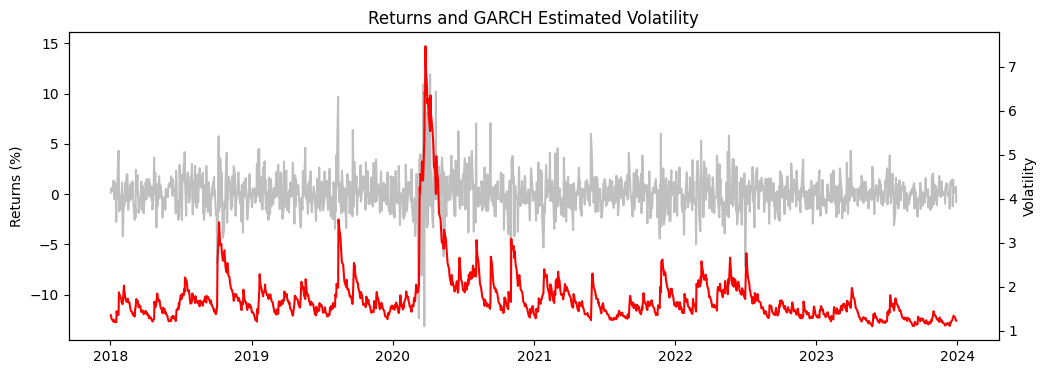

In [9]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(data.index, data["Returns"], color="gray", alpha=0.5)
ax1.set_ylabel("Returns (%)")

ax2 = ax1.twinx()
ax2.plot(data.index, data["GARCH_Volatility"], color="red")
ax2.set_ylabel("Volatility")

plt.title("Returns and GARCH Estimated Volatility")
plt.show()


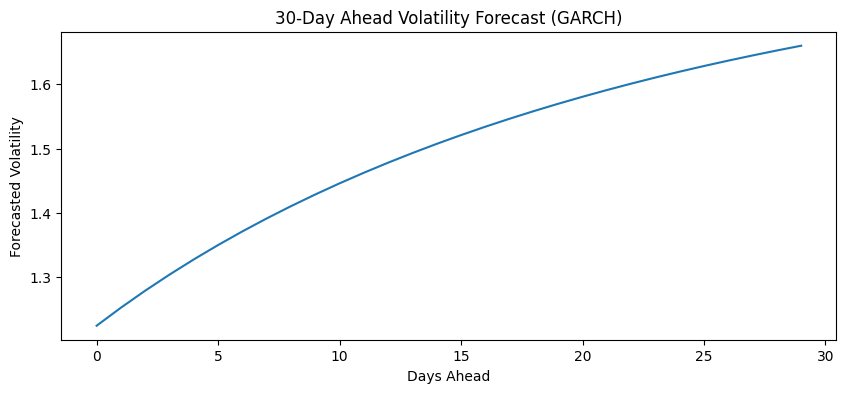

In [10]:
forecast = garch_fit.forecast(horizon=30)

vol_forecast = np.sqrt(forecast.variance.values[-1])

plt.figure(figsize=(10,4))
plt.plot(vol_forecast)
plt.title("30-Day Ahead Volatility Forecast (GARCH)")
plt.xlabel("Days Ahead")
plt.ylabel("Forecasted Volatility")
plt.show()
